# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 `상가(상권)정보_의료기관_201909`를 다운로드 받아봅니다.
* 구글 드라이브에서 받기 : https://drive.google.com/file/d/1cXjyinwSkPQkUWiOj1mv4bs3eJ66WQyz/view?usp=sharing

## 필요한 라이브러리 불러오기

In [12]:
import pandas as pd
import numpy as np

## 시각화를 위한 폰트 설정

In [13]:
import platform
system_name = platform.system()
system_name

'Windows'

In [14]:
# 시각화를 위한 폰트설정
import platform
import matplotlib.pyplot as plt

system_name = platform.system()

if system_name == "Darwin" :
    font_family = "AppleGothic"
elif system_name == "Windows":
    font_family = "Malgun Gothic"
else:
    # Linux
    !apt -qq -y install fonts-nanum > /dev/null
    import matplotlib.font_manager as fm

    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = fm.FontProperties(fname=fontpath, size=9)
    fm._rebuild()
    font_family = "NanumBarunGothic"
    
    
# 그래프 스타일 설정
plt.style.use("ggplot")

# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False) # 마이너스 폰트 깨지는 거 보정

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기
* 판다스에서 데이터를 로드할 때는 read_csv를 사용합니다.
* 데이터를 로드해서 df라는 변수에 담습니다.
* 그리고 shape 를 통해 데이터의 갯수를 찍습니다. 결과는 (행, 열) 순으로 출력됩니다.

In [15]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: B05A-230F

 C:\Users\SAMSUNG\Desktop\대웅 DABA 4기\data 디렉터리

2021-05-01  오전 09:39    <DIR>          .
2021-05-01  오전 09:39    <DIR>          ..
2019-10-20  오후 06:35        47,373,662 상가(상권)정보_의료기관_201909.csv
2021-05-01  오전 09:36             6,357 서울특별시 종로구 병원 인허가 정보.csv
2021-05-01  오전 09:34           136,475 서울특별시 종로구 약국 인허가 정보.csv
2021-05-01  오전 09:34           378,658 서울특별시 종로구 의원 인허가 정보.csv
               4개 파일          47,895,152 바이트
               2개 디렉터리  15,144,644,608 바이트 남음


In [16]:
# 상가(상권)정보_의료기관_201909.csv 파일 불러오기

# 대용량 data인 경우 dtype 계산에 시간이 걸려서 warning message가 나오는데 이를 없애줌
df = pd.read_csv('data/상가(상권)정보_의료기관_201909.csv', low_memory=False) 
print(df.shape)
df.head()

(91335, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


## 데이터 미리보기
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [17]:
# head 로 데이터를 미리보기 합니다.

df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [18]:
# tail 로 마지막 부분에 있는 데이터를 불러옵니다.

df.tail(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


In [19]:
# sample 로 미리보기를 합니다.

df.sample(3) # random_state=number

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
15943,7303920,정동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4687025024102630001015920,NaN,전라남도 영광군 영광읍 중앙로5길 2,513802.0,57046.0,NaN,1,NaN,126.512290,35.275917
66167,27721167,실로암치과기공소,NaN,S,의료,S03,유사의료업,S03B06,치과기공소,C27192,...,4511112900107840002027097,강남치과,전라북도 전주시 완산구 당산로 116,560821.0,54950.0,NaN,2,NaN,127.120988,35.832002
84213,15506050,공원옆동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,1147010100103210006021525,센트럴프라자,서울특별시 양천구 목동서로 349,158885.0,8095.0,NaN,1,104,126.865292,37.517398


In [20]:
# ?? -> 소스코드 보기
df.head??

## 데이터 요약하기

### 요약정보

In [21]:
# info로 데이터의 요약을 봅니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 컬럼명 보기

In [22]:
# 컬럼명만 출력해 봅니다.

df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 데이터 타입

In [23]:
# 데이터 타입만 출력합니다.

df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치

In [24]:
df.isnull()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False
91331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
91332,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
91333,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False


In [25]:
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

In [26]:
df.isnull().mean()*100

상가업소번호        0.000000
상호명           0.000000
지점명          98.526304
상권업종대분류코드     0.000000
상권업종대분류명      0.000000
상권업종중분류코드     0.000000
상권업종중분류명      0.000000
상권업종소분류코드     0.000000
상권업종소분류명      0.000000
표준산업분류코드      5.388953
표준산업분류명       5.388953
시도코드          0.414956
시도명           0.414956
시군구코드         0.414956
시군구명          0.414956
행정동코드         0.000000
행정동명          0.414956
법정동코드         0.060218
법정동명          0.060218
지번코드          0.000000
대지구분코드        0.000000
대지구분명         0.000000
지번본번지         0.000000
지번부번지        21.082827
지번주소          0.000000
도로명코드         0.000000
도로명           0.000000
건물본번지         0.000000
건물부번지        88.389993
건물관리번호        0.000000
건물명          49.139979
도로명주소         0.000000
구우편번호         0.013138
신우편번호         0.002190
동정보          91.891389
층정보          51.777522
호정보          82.973668
경도            0.000000
위도            0.000000
dtype: float64

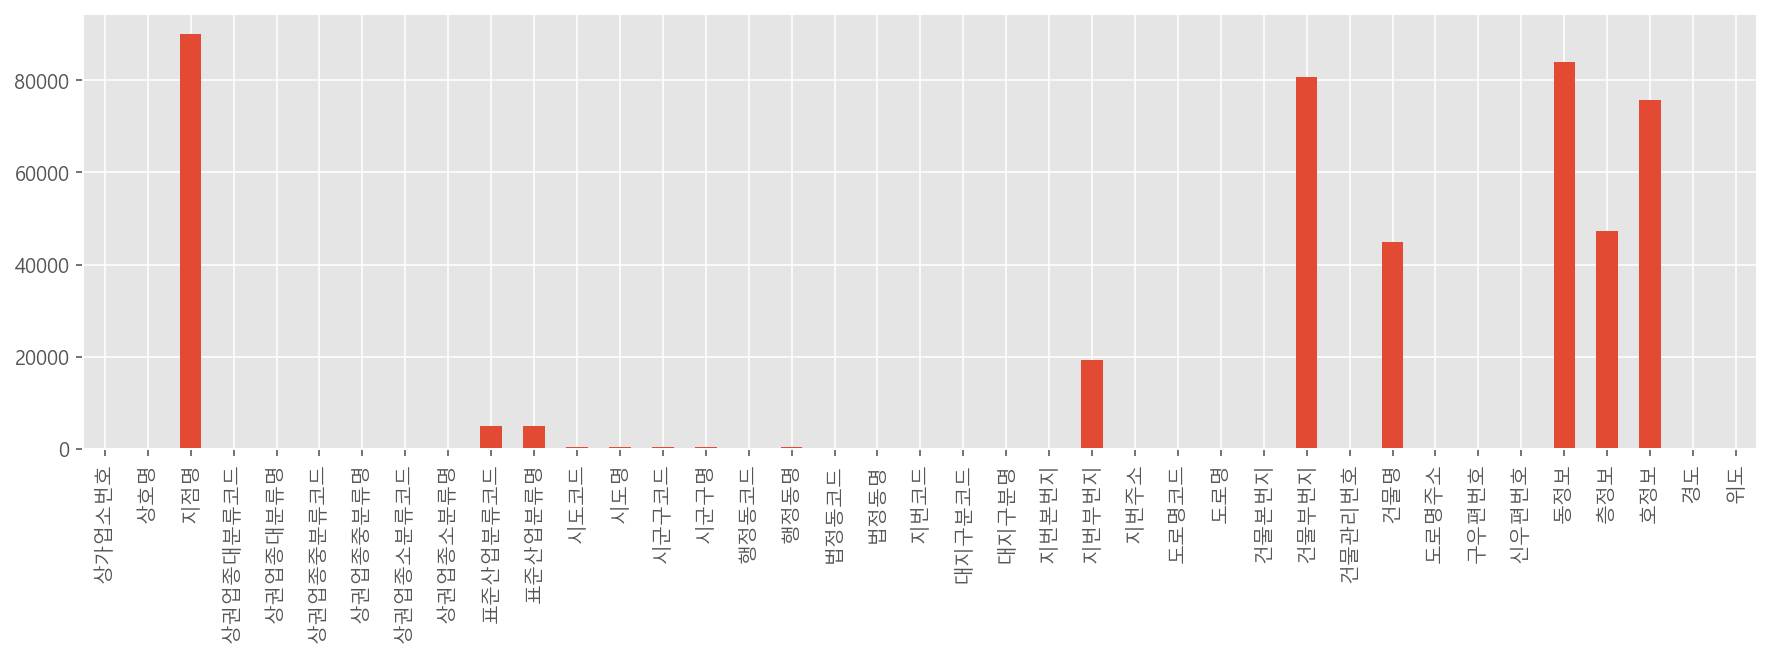

In [27]:
# 위에서 구한 결측치를 .plot.bar 를 통해 막대그래프로 표현합니다. 

df_na_sum = df.isnull().sum()
df_na_sum.plot.bar(figsize=(15,4))

In [28]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head 로 미리보기를 합니다.

df_null_count = df_na_sum.to_frame().reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 컬럼명 변경하기

In [29]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경해 줍니다.

df_null_count.columns = ['컬럼명', '결측치수']
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 정렬하기

In [30]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values 를 통해 정렬해서
# 결측치가 많은 순으로 상위 10개만 출력합니다.

df_null_count = df_null_count.sort_values(by=['결측치수', '컬럼명'], ascending=[False, True])[:10]
# ascending을 boolean list로 지정하면 순차적으로 정렬할 수 있음
# inplace 쓸 수 있지만 메모리 문제로 인해 다시 변수에 담는 걸 추천한다고 함!!

#### inplace 쓸 수 있지만 메모리 문제로 인해 다시 변수에 담는 걸 추천한다고 함!!  
-> 나중에 다시 찾아보자

## 특정 컬럼만 불러오기

In [31]:
# 지점명 컬럼을 불러옵니다.
df['지점명']

0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [32]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담습니다.

drop_columns = df_null_count.head(10)['컬럼명'].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류명',
 '표준산업분류코드',
 '시군구명']

In [33]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.

df[drop_columns]

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류명,표준산업분류코드,시군구명
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,일반 의원,Q86201,안산시 단원구
1,NaN,NaN,NaN,NaN,4,NaN,14.0,일반 의원,Q86201,강남구
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,일반 의원,Q86201,시흥시
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,수영구
4,수지점,NaN,NaN,NaN,1,NaN,2.0,의약품 및 의료용품 소매업,G47811,용인시 수지구
...,...,...,...,...,...,...,...,...,...,...
91330,베스트,NaN,NaN,NaN,NaN,NaN,NaN,의약품 및 의료용품 소매업,G47811,서구
91331,봄산후조,NaN,NaN,NaN,NaN,청한프라자,NaN,개인 간병인 및 유사 서비스업,S96993,고양시 덕양구
91332,NaN,NaN,NaN,NaN,2,한신시티빌,1.0,일반 병원,Q86102,금정구
91333,NaN,NaN,NaN,NaN,NaN,NaN,9.0,한의원,Q86203,강동구


## 제거하기

In [34]:
# drop 으로 결측치가 많은 컬럼을 제거하고 shape를 통해 데이터의 갯수 확인하기
print(df.shape)
df_drop = df.drop(drop_columns, axis=1)
print(df_drop.shape)

(91335, 39)
(91335, 29)


In [35]:
# info 보기

df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도코드       90956 non-null  float64
 9   시도명        90956 non-null  object 
 10  시군구코드      90956 non-null  float64
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 기술 통계

In [36]:
# 평균값

df_drop.describe()

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,도로명코드,건물본번지,구우편번호,신우편번호,경도,위도
count,9.133500e+04,90956.000000,90956.000000,9.133500e+04,9.128000e+04,9.133500e+04,91335.000000,91335.000000,9.133500e+04,91335.000000,91323.000000,91333.00000,91335.000000,91335.000000
mean,2.121818e+07,32.586712,32898.381877,3.293232e+09,3.293385e+09,3.293191e+18,1.001336,587.534549,3.293207e+11,251.200482,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,13.045138,12985.393171,1.297387e+09,1.297706e+09,1.297393e+18,0.036524,582.519364,1.297391e+11,477.456487,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,11.000000,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.111020e+11,0.000000,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,26.000000,26350.000000,2.635065e+09,2.635011e+09,2.635011e+18,1.000000,162.000000,2.635042e+11,29.000000,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,41.000000,41117.000000,4.111758e+09,4.111710e+09,4.111711e+18,1.000000,462.000000,4.111743e+11,92.000000,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,43.000000,43113.000000,4.311370e+09,4.311311e+09,4.311311e+18,1.000000,858.000000,4.311332e+11,257.000000,602811.000000,46044.00000,128.108919,37.507463
max,2.852470e+07,50.000000,50130.000000,5.013061e+09,5.013032e+09,5.013061e+18,2.000000,7338.000000,5.013049e+11,8795.000000,799801.000000,63643.00000,130.909912,38.499659


In [37]:
# 중앙값

df_drop.median()

상가업소번호    2.211900e+07
시도코드      4.100000e+01
시군구코드     4.111700e+04
행정동코드     4.111758e+09
법정동코드     4.111710e+09
지번코드      4.111711e+18
대지구분코드    1.000000e+00
지번본번지     4.620000e+02
도로명코드     4.111743e+11
건물본번지     9.200000e+01
건물관리번호    4.113110e+24
구우편번호     4.403000e+05
신우편번호     2.435300e+04
경도        1.270846e+02
위도        3.723465e+01
dtype: float64

In [38]:
# 최댓값
df_drop.max()

상가업소번호                        28524703
상호명                           老世노세요양병원
상권업종대분류코드                            S
상권업종대분류명                            의료
상권업종중분류코드                          S07
상권업종중분류명                      의료관련서비스업
상권업종소분류코드                       S07A08
상권업종소분류명                           혈액원
시도코드                                50
시군구코드                            50130
행정동코드                       5013061000
법정동코드                      5.01303e+09
지번코드               5013061000220810009
대지구분코드                               2
대지구분명                                산
지번본번지                             7338
지번주소                  충청북도 충주시 칠금동 874
도로명코드                     501304851176
도로명                       충청북도 충주시 형설로
건물본번지                             8795
건물관리번호       5013032026104530001000001
도로명주소                  충청북도 충주시 형설로 98
구우편번호                           799801
신우편번호                            63643
경도                              130.91
위도                       

In [39]:
# 최솟값
df_drop.min()

상가업소번호                         2901108
상호명                         007닥터공공칠의원
상권업종대분류코드                            S
상권업종대분류명                            의료
상권업종중분류코드                          S01
상권업종중분류명                            병원
상권업종소분류코드                       S01B01
상권업종소분류명                          기타병원
시도코드                                11
시군구코드                            11110
행정동코드                       1111051500
법정동코드                      1.11101e+09
지번코드               1111010200200700010
대지구분코드                               1
대지구분명                               대지
지번본번지                                1
지번주소              강원도 강릉시 강동면 상시동리 147
도로명코드                     111102005001
도로명                        강원도 강릉시 가작로
건물본번지                                0
건물관리번호       1111010200100700010031306
도로명주소                강원도 강릉시 가작로 248-6
구우편번호                           100011
신우편번호                             1000
경도                             124.718
위도                       

In [40]:
# 갯수
df_drop.count()

상가업소번호       91335
상호명          91335
상권업종대분류코드    91335
상권업종대분류명     91335
상권업종중분류코드    91335
상권업종중분류명     91335
상권업종소분류코드    91335
상권업종소분류명     91335
시도코드         90956
시도명          90956
시군구코드        90956
행정동코드        91335
행정동명         90956
법정동코드        91280
법정동명         91280
지번코드         91335
대지구분코드       91335
대지구분명        91335
지번본번지        91335
지번주소         91335
도로명코드        91335
도로명          91335
건물본번지        91335
건물관리번호       91335
도로명주소        91335
구우편번호        91323
신우편번호        91333
경도           91335
위도           91335
dtype: int64

### 기술통계값 요약하기 - describe

describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
기본적으로 수치형 데이터를 요약해서 보여줍니다.
데이터의 갯수, 평균, 표준편차, 최솟값, 
1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.

In [41]:
# 위도를 describe로 요약해 봅니다.
df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [42]:
# 2개의 컬럼(위도, 경도)을 describe 로 요약합니다.

df[['위도', '경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [43]:
# describe로 문자열 데이터타입의 요약을 봅니다.

df.describe(include='object')

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,91335,1346,91335,91335,91335,91335,91335,91335,86413,86413,...,91280,91335,91335,91335,91335,46453,91335,7406,44044,15551
unique,56910,858,1,1,5,5,34,34,15,15,...,2822,2,53118,16610,54142,17946,54031,556,74,849
top,리원,장례식장,S,의료,S01,병원,S02A01,약국,Q86201,일반 의원,...,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,현대아파트,서울특별시 동대문구 약령중앙로8길 10,1,1,1
freq,152,97,91335,91335,60774,60774,18964,18964,22555,22555,...,874,91213,198,326,198,131,198,1571,15994,1286


### 중복제거한 값 보기
* unique 로 중복을 제거한 값을 보고 nunique 로 갯수를 세어봅니다.

In [44]:
# "상권업종대분류명"
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [45]:
df["상권업종대분류명"].nunique()

1

In [46]:
# "상권업종중분류명"
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [47]:
df["상권업종중분류명"].nunique()

5

In [48]:
pd.isnull(df["지점명"]).sum()

89989

In [49]:
print(len(df["지점명"].unique())) # len은 결측치를 포함해서 세지만
print(df["지점명"].nunique()) # nunique는 결측치를 포함하지 않고 센다

859
858


In [50]:
# "상권업종소분류명"
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [51]:
df["상권업종소분류명"].nunique()

34

In [52]:
# nunique 대신 len 을 사용할 수도 있습니다.
len(df["상권업종소분류명"].unique())


34

### 그룹화된 요약값 보기 - value_counts
* value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.

In [53]:
# value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.
# 시도코드를 세어봅니다.
df['시도코드'].value_counts()

41.0    21374
11.0    18943
26.0     6473
48.0     4973
28.0     4722
27.0     4597
47.0     4141
45.0     3894
44.0     3578
46.0     3224
29.0     3214
30.0     3067
43.0     2677
42.0     2634
31.0     1997
50.0     1095
36.0      353
Name: 시도코드, dtype: int64

In [54]:
# 시도명을 세어봅니다.

df['시도명'].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [55]:
# normalize=True 옵션을 사용하면 비율을 구할 수 있습니다.
df['시도명'].value_counts(normalize=True)*100

경기도        23.499274
서울특별시      20.826553
부산광역시       7.116628
경상남도        5.467479
인천광역시       5.191521
대구광역시       5.054092
경상북도        4.552751
전라북도        4.281191
충청남도        3.933770
전라남도        3.544571
광주광역시       3.533577
대전광역시       3.371960
충청북도        2.943181
강원도         2.895906
울산광역시       2.195567
제주특별자치도     1.203879
세종특별자치시     0.388100
Name: 시도명, dtype: float64

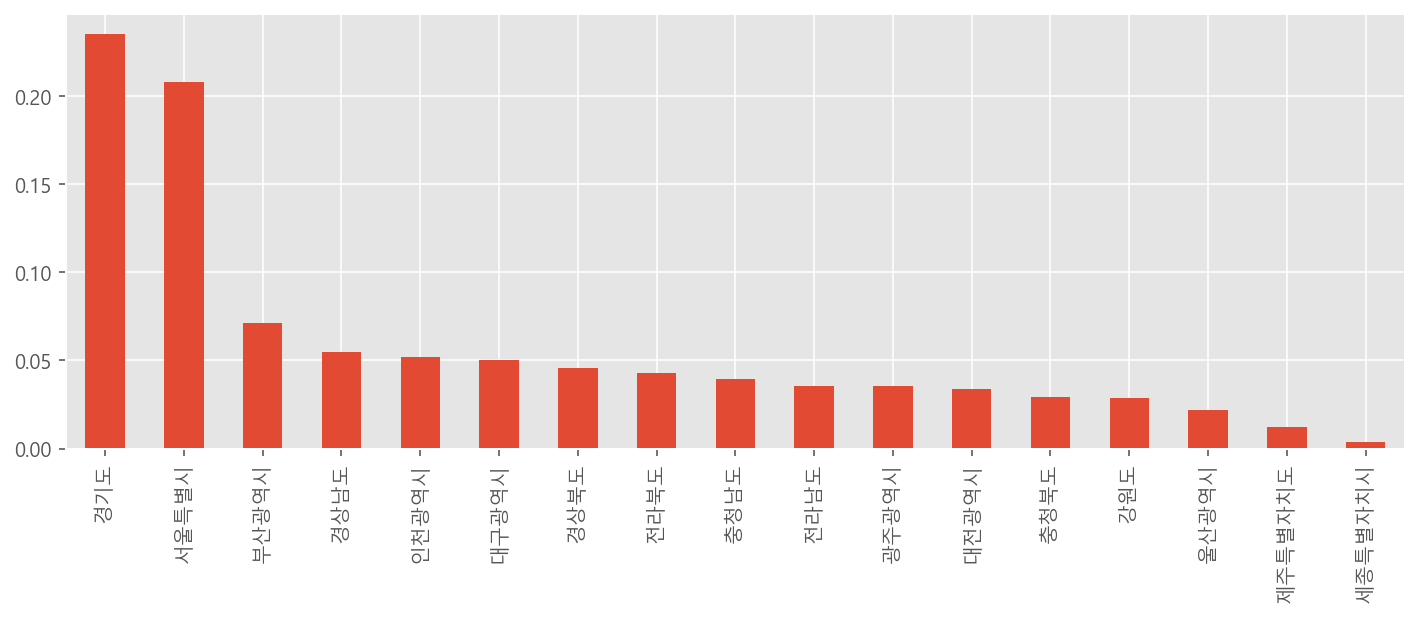

In [56]:
# Pandas 에는 plot기능을 내장하고 있습니다. 
# 위에서 분석한 시도명 수를 막대그래프로 표현해 봅니다.

df['시도명'].value_counts(normalize=True).plot.bar(figsize=(12, 4))

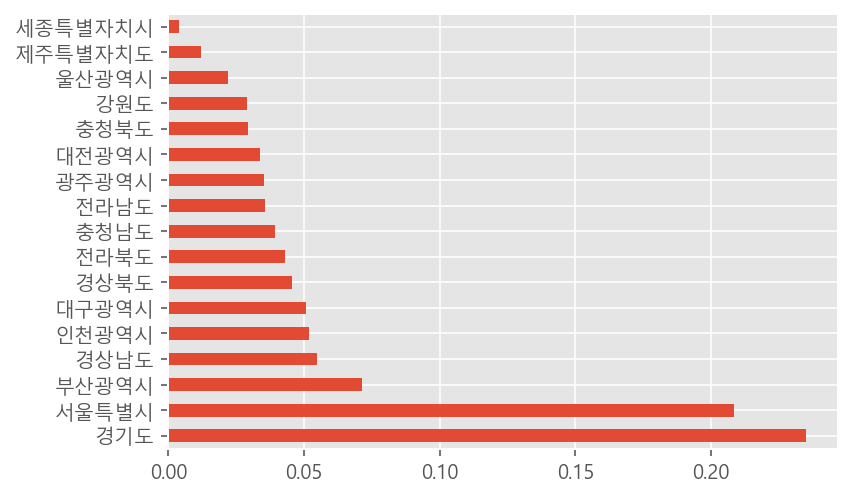

In [57]:
df['시도명'].value_counts(normalize=True).plot.barh()

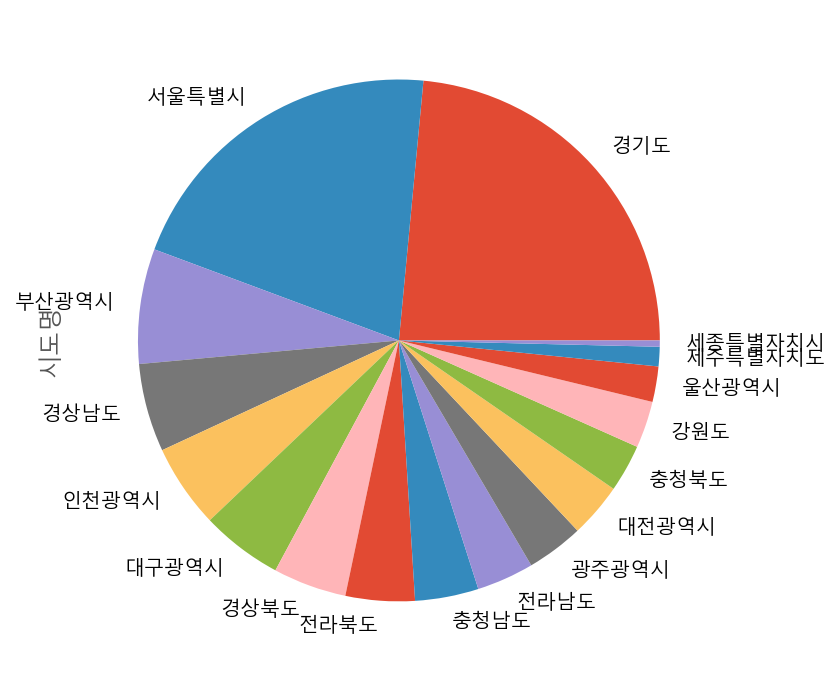

In [58]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
df['시도명'].value_counts(normalize=True).plot.pie(figsize=(6, 6))

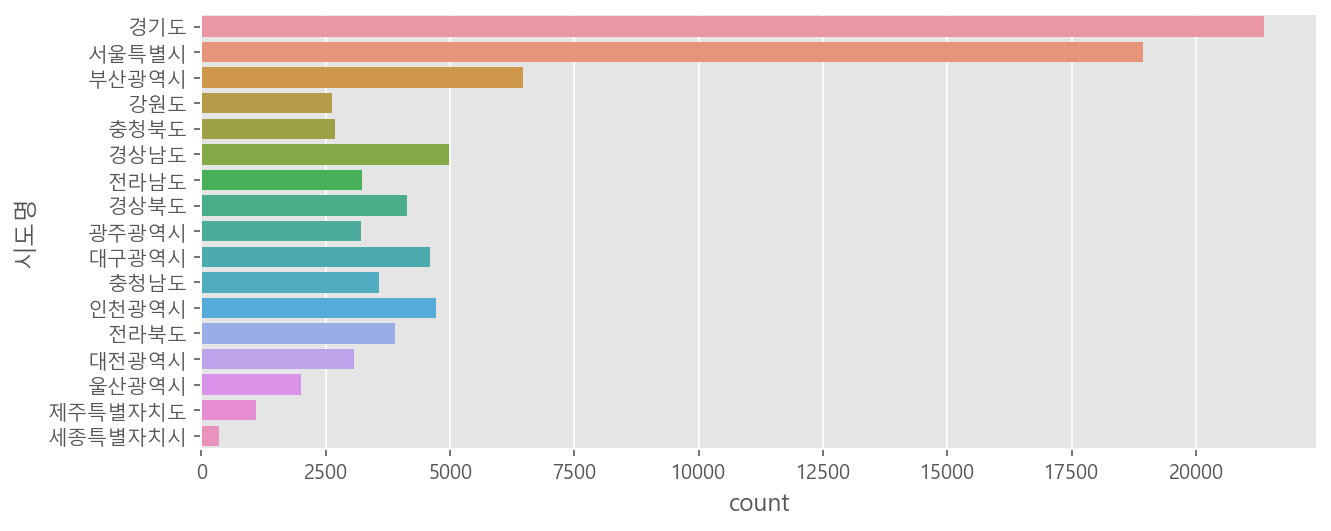

In [59]:
# countplot 으로 "시도명"의 빈도수를 구합니다.

import seaborn as sns

plt.figure(figsize=(10, 4))
sns.countplot(y='시도명', data=df)
plt.show()

In [60]:
# "상권업종대분류명"으로 갯수를 세어봅니다.

df['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [61]:
# "상권업종중분류명"으로 갯수를 세어봅니다.

df['상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [62]:
# normalize=True 를 사용해 비율을 구해봅니다.

df['상권업종중분류명'].value_counts(normalize=True)*100

병원          66.539662
약국/한약방      22.907976
수의업          5.827996
유사의료업        4.132041
의료관련서비스업     0.592325
Name: 상권업종중분류명, dtype: float64

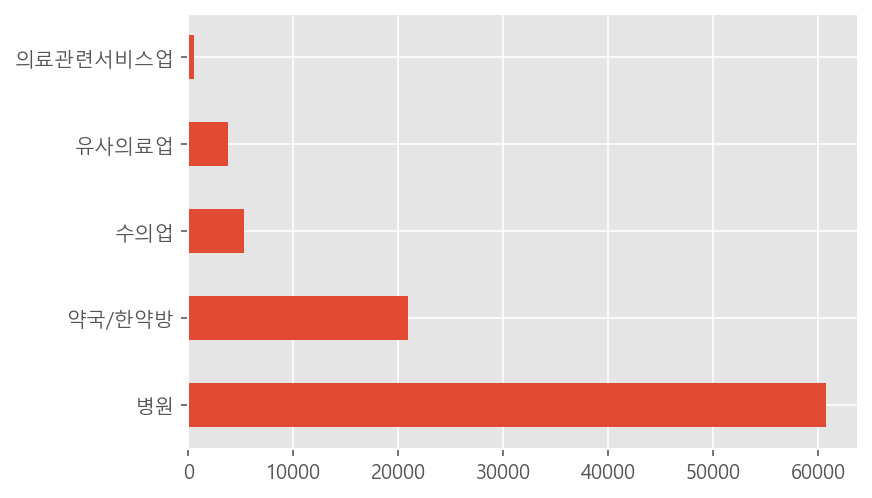

In [63]:
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다. 

df['상권업종중분류명'].value_counts().plot.barh()
plt.show()

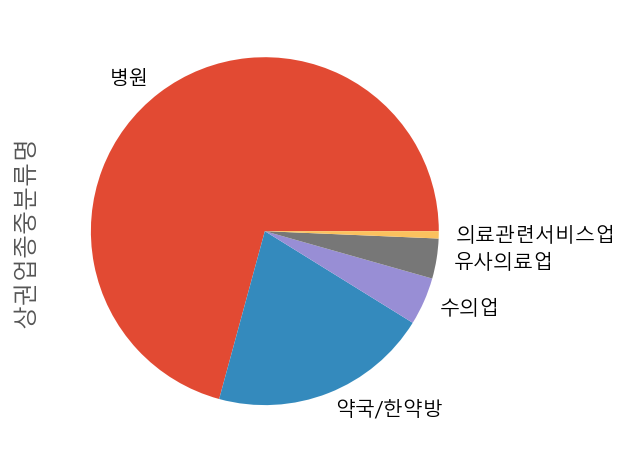

In [229]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.

df['상권업종중분류명'].value_counts().plot.pie()
plt.show()

In [64]:
# "상권업종소분류명" 에 대한 그룹화 된 값을 카운트 합니다.

df['상권업종소분류명'].value_counts()

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
수의업-기타         9
접골원            9
제대혈            1
Name: 상권업종소분류명, dtype: int64

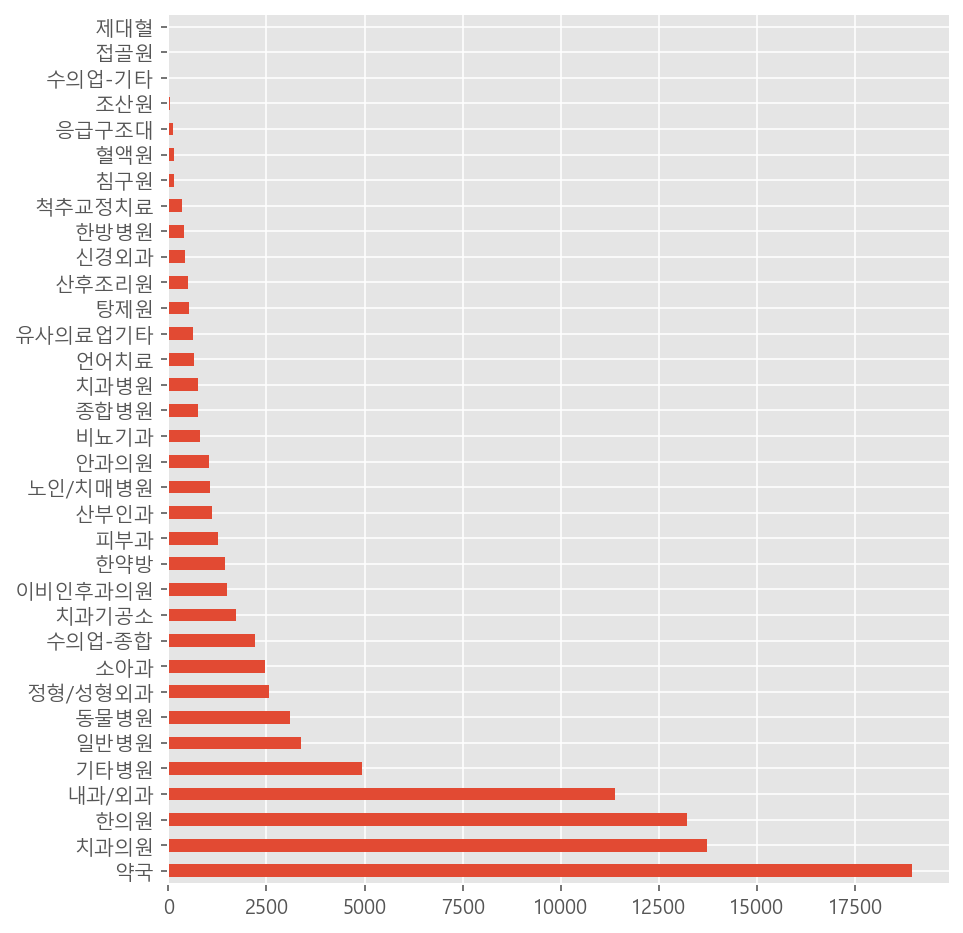

In [68]:
# "상권업종소분류명"으로 갯수를 세어봅니다.
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다. 

c = df['상권업종소분류명'].value_counts()
c.plot.barh(figsize=(7, 8), grid=True)

## 데이터 색인하기
* 특정 데이터만 모아서 따로 봅니다.

In [70]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 가져와서 
# df_medical 이라는 변수에 담아봅니다.
# 그리고 head()를 통해 미리보기를 합니다.

df_medical = df[df["상권업종중분류명"] == "약국/한약방"]
df_medical.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
6,20733252,춘산한약방,NaN,S,의료,S02,약국/한약방,S02A02,한약방,G47811,...,4211010500101000000023668,NaN,강원도 춘천시 낙원길 50,200042.0,24273.0,NaN,2,NaN,127.726905,37.880504
7,20582210,부부탕제원,NaN,S,의료,S02,약국/한약방,S02A03,탕제원,G47859,...,4311112000101870017042942,NaN,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,NaN,1,NaN,127.499206,36.625355
10,21057519,민생약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4889046030200780002048274,NaN,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,NaN,NaN,NaN,128.118615,35.575962
13,21217689,제중당한약방,NaN,S,의료,S02,약국/한약방,S02A02,한약방,G47811,...,4683035023102960000000001,NaN,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,NaN,NaN,NaN,126.630348,34.834080


In [77]:
# "상권업종대분류명" 에서 "의료"만 가져옵니다.
# df.loc를 사용하면 행,열을 함께 가져올 수 있습니다.
# 이 기능을 통해 "상권업종중분류명" 만 가져옵니다. 
# 그리고 가져온 결과를 value_counts 를 통해 중분류의 갯수를 세어봅니다.

df.loc[df["상권업종대분류명"] == "의료"]["상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [76]:
# 위와 똑같은 기능을 수행하는 코드입니다. 아래와 같이 한 줄에 표현할 수도 있습니다. 
# df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [80]:
# 유사의료업만 따로 모아봅니다.

df_medi = df[df["상권업종중분류명"] ==  "유사의료업"]

In [81]:
# 상호명을 그룹화해서 갯수를 세어봅니다.
# value_counts 를 사용해서 상위 10개를 출력합니다.

df['상호명'].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [82]:
# 유사의료업만 df_medi 변수에 담겨져 있습니다.
# df_medi 변수에서 상호명으로 갯수를 세어봅니다. 
# 가장 많은 상호 상위 10개를 출력해 봅니다.

df_medi['상호명'].value_counts().head(10)

리원           32
고려수지침        22
대한적십자사       17
헌혈의집         12
고려수지침학회      10
수치과기공소       10
제일치과기공소       9
이사랑치과기공소      8
대한응급환자이송단     8
아트치과기공소       8
Name: 상호명, dtype: int64

### 여러 조건으로 색인하기

In [89]:
# "상권업종소분류명"이 "약국" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.

df_seoul_drug = df[(df['상권업종소분류명'] == '약국') & (df['시도명'] == '서울특별시')]
df_seoul_drug.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
33,20816709,이즈타워약,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1168010100108210001000001,이즈타워,서울특별시 강남구 테헤란로 101,135080.0,6134.0,NaN,1,NaN,127.028023,37.498656
51,20855710,진흥약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1174010600106090000000001,둔촌푸르지오아파트,서울특별시 강동구 명일로 172,134767.0,5360.0,NaN,NaN,NaN,127.145055,37.534135
130,21589838,신세계약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1126010600106460000000300,금강리빙스텔,서울특별시 중랑구 신내로 211,131130.0,2024.0,NaN,1,NaN,127.092597,37.616424
136,22388303,메디팜한솔약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1120010700103460012016935,한진노변상가,서울특별시 성동구 행당로 82,133777.0,4717.0,NaN,1,NaN,127.027513,37.556238
141,22412563,명약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1123010900102860121007257,NaN,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,NaN,1,NaN,127.060556,37.587349


### 구별로 보기

In [90]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화 해서 갯수를 세어봅니다.
# 구별로 약국이 몇개가 있는지 확인해 봅니다.

c = df_seoul_drug['시군구명'].value_counts()
c

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
마포구     136
강서구     136
중랑구     129
서대문구    120
관악구     118
강동구     117
종로구     111
양천구     109
중구      106
강북구     104
구로구     102
동작구      96
성동구      88
용산구      87
금천구      85
도봉구      84
Name: 시군구명, dtype: int64

In [91]:
# normalize=True 를 통해 비율을 구해봅니다.

df_seoul_drug['시군구명'].value_counts(normalize=True)

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
노원구     0.047220
성북구     0.044705
은평구     0.042191
영등포구    0.040514
마포구     0.037999
강서구     0.037999
중랑구     0.036044
서대문구    0.033529
관악구     0.032970
강동구     0.032691
종로구     0.031014
양천구     0.030455
중구      0.029617
강북구     0.029058
구로구     0.028500
동작구     0.026823
성동구     0.024588
용산구     0.024308
금천구     0.023750
도봉구     0.023470
Name: 시군구명, dtype: float64

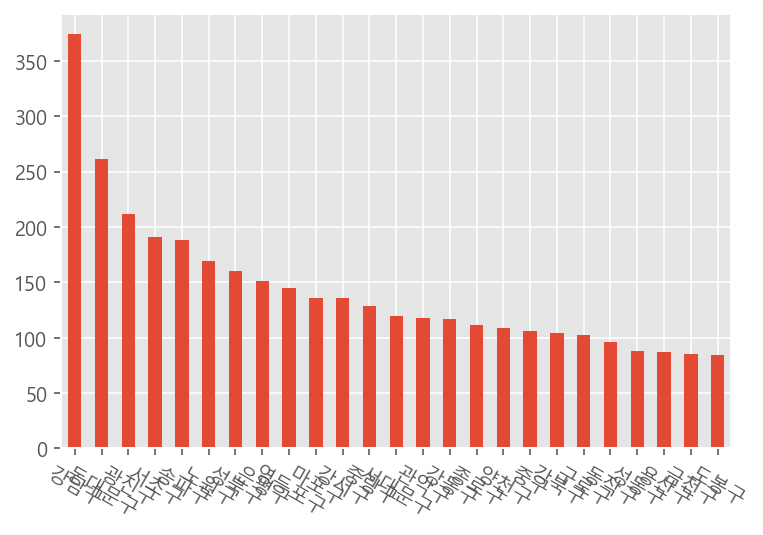

In [94]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그립니다.

c.plot.bar(rot=-30)

In [98]:
# "상권업종소분류명"이 "종합병원" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.

df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"] == "서울특별시")].copy()
df_seoul_hospital.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
305,25155642,대진의료재단,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1121510100100580025000733,재단법인대순진리회,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,NaN,NaN,NaN,127.088279,37.559048
353,20471487,홍익병원별관,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1147010100108970013001044,홍익병원별관,서울특별시 양천구 국회대로 250,158070.0,7937.0,NaN,1,NaN,126.862805,37.529213
385,20737057,SNUH,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1168010100107360055027688,성보빌딩,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,NaN,4,NaN,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156011000100620000031477,여의도성모병원,서울특별시 영등포구 63로 10,150713.0,7345.0,NaN,1,NaN,126.936693,37.518296
2461,20024045,한양,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1120010700100150001019623,한대동문회관,서울특별시 성동구 마조로 22-2,133070.0,4763.0,NaN,4,NaN,127.041325,37.559469


In [106]:
# "시군구명" 으로 그룹화 해서 구별로 종합병원의 수를 세어봅니다.

df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
송파구      5
강동구      5
중구       5
강북구      4
서대문구     4
양천구      4
도봉구      4
성북구      3
종로구      2
강서구      2
금천구      2
성동구      2
동대문구     2
노원구      2
관악구      2
구로구      2
중랑구      2
은평구      1
동작구      1
마포구      1
용산구      1
Name: 시군구명, dtype: int64

### 텍스트 데이터 색인하기

In [108]:
# str.contains 를 사용해서 "상호명"에 "대학병원"이 들어가는 것을 가져와서 head()로 미리보기 합니다.

df_seoul_hospital[~df_seoul_hospital["상호명"].str.contains("종합병원")]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
305,25155642,대진의료재단,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1121510100100580025000733,재단법인대순진리회,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,NaN,NaN,NaN,127.088279,37.559048
353,20471487,홍익병원별관,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1147010100108970013001044,홍익병원별관,서울특별시 양천구 국회대로 250,158070.0,7937.0,NaN,1,NaN,126.862805,37.529213
385,20737057,SNUH,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1168010100107360055027688,성보빌딩,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,NaN,4,NaN,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156011000100620000031477,여의도성모병원,서울특별시 영등포구 63로 10,150713.0,7345.0,NaN,1,NaN,126.936693,37.518296
2461,20024045,한양,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1120010700100150001019623,한대동문회관,서울특별시 성동구 마조로 22-2,133070.0,4763.0,NaN,4,NaN,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,응급의료센터,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700101230000017226,가톨릭대학교성의교정,서울특별시 서초구 반포대로 222,137701.0,6591.0,NaN,1,NaN,127.005841,37.502382
76508,12292992,라마르의원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1174010900104530021010314,원방빌딩,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,NaN,NaN,NaN,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1114012700100010001019574,명동성당,서울특별시 중구 명동길 74,100809.0,4537.0,NaN,NaN,NaN,126.986758,37.563662
90581,16332576,씨엠병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156010500100900000035097,충무병원,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,NaN,NaN,NaN,126.903857,37.518807


In [110]:
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700105510000017194,NaN,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,1,1,NaN,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700105470006016762,이이빌딩,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,NaN,1,NaN,127.001756,37.499095


In [111]:
df_seoul_hospital.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [114]:
# str.startswith 를 사용해 "서울"로 시작하는 도로명주소를 가져와서 head()로 미리보기 합니다.

df_seoul_hospital[df_seoul_hospital["도로명주소"].str.startswith("서울")].head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
305,25155642,대진의료재단,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1121510100100580025000733,재단법인대순진리회,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,NaN,NaN,NaN,127.088279,37.559048
353,20471487,홍익병원별관,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1147010100108970013001044,홍익병원별관,서울특별시 양천구 국회대로 250,158070.0,7937.0,NaN,1,NaN,126.862805,37.529213
385,20737057,SNUH,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1168010100107360055027688,성보빌딩,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,NaN,4,NaN,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156011000100620000031477,여의도성모병원,서울특별시 영등포구 63로 10,150713.0,7345.0,NaN,1,NaN,126.936693,37.518296
2461,20024045,한양,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1120010700100150001019623,한대동문회관,서울특별시 성동구 마조로 22-2,133070.0,4763.0,NaN,4,NaN,127.041325,37.559469


In [115]:
# str.endswith를 사용해서 "상호명"이 "병원"으로 끝나는 데이터를 가져와서 head()로 미리보기 합니다.

df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("병원")].head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
2687,20890249,백산의료재단친구병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1174010900103570000009066,친구병원,서울특별시 강동구 올림픽로 684,134750.0,5327.0,NaN,1,NaN,127.125283,37.542271
2801,20867576,서울보훈병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1174010600100060002000302,중앙보훈병원,서울특별시 강동구 진황도로61길 53,134791.0,5368.0,NaN,1,NaN,127.147914,37.528461
4285,21914819,서울대학교병원,강남센터,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1168010100107370000023659,강남파이낸스센터,서울특별시 강남구 테헤란로 152,135984.0,6236.0,NaN,38,NaN,127.036487,37.500014
4856,22256379,제일병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1114013600100010002018718,제일병원,서울특별시 중구 서애로1길 17,100380.0,4619.0,NaN,NaN,NaN,126.999620,37.561709
8706,21736553,고려대학교구로병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1153010200100800000024727,고려대부속구로병원,서울특별시 구로구 구로동로 148,152703.0,8308.0,NaN,1,NaN,126.884663,37.491209


### 특정 지역만 보기

In [116]:
# 서울에 있는 데이터의 위도와 경도를 봅니다.
# 결과를 df_seoul 이라는 데이터프레임에 저장합니다.
# 새로운 변수에 데이터프레임을 저장시 copy()를 사용합니다.

df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 39)

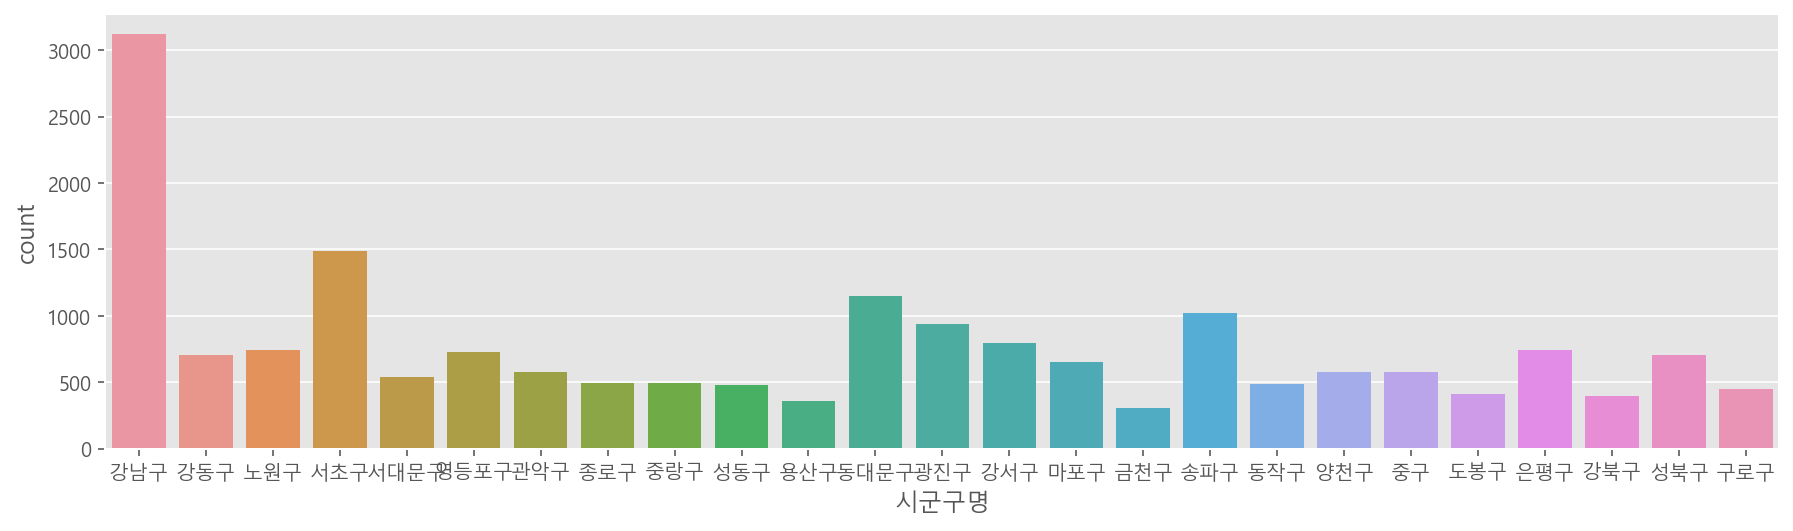

In [117]:
# seaborn 의 countplot 을 사용해서 위에서 만든 df_seoul 데이터프레임의
# 시군구명을 시각화 합니다.

plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul, x="시군구명")

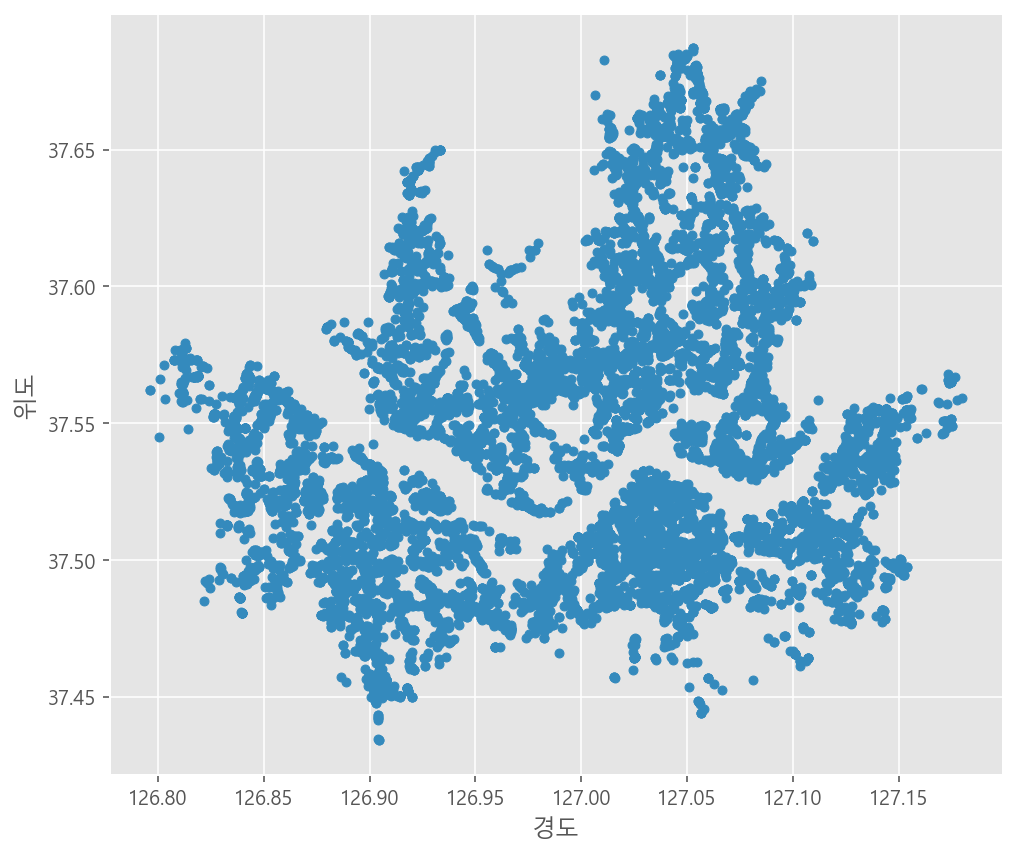

In [118]:
# Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.

df_seoul[["경도", "위도", "시군구명"]].plot.scatter(x="경도", y="위도", figsize=(8, 7), grid=True)

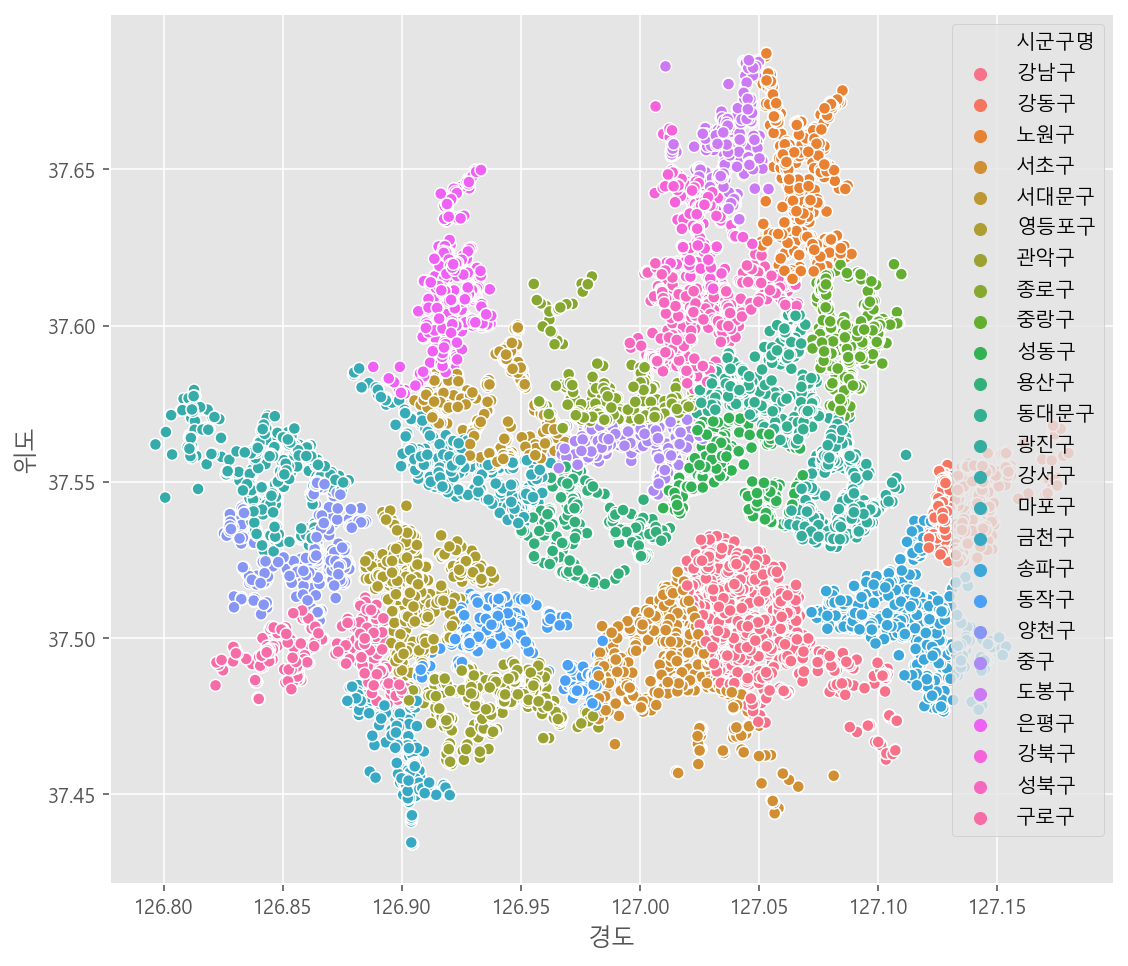

In [120]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.

plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="시군구명")

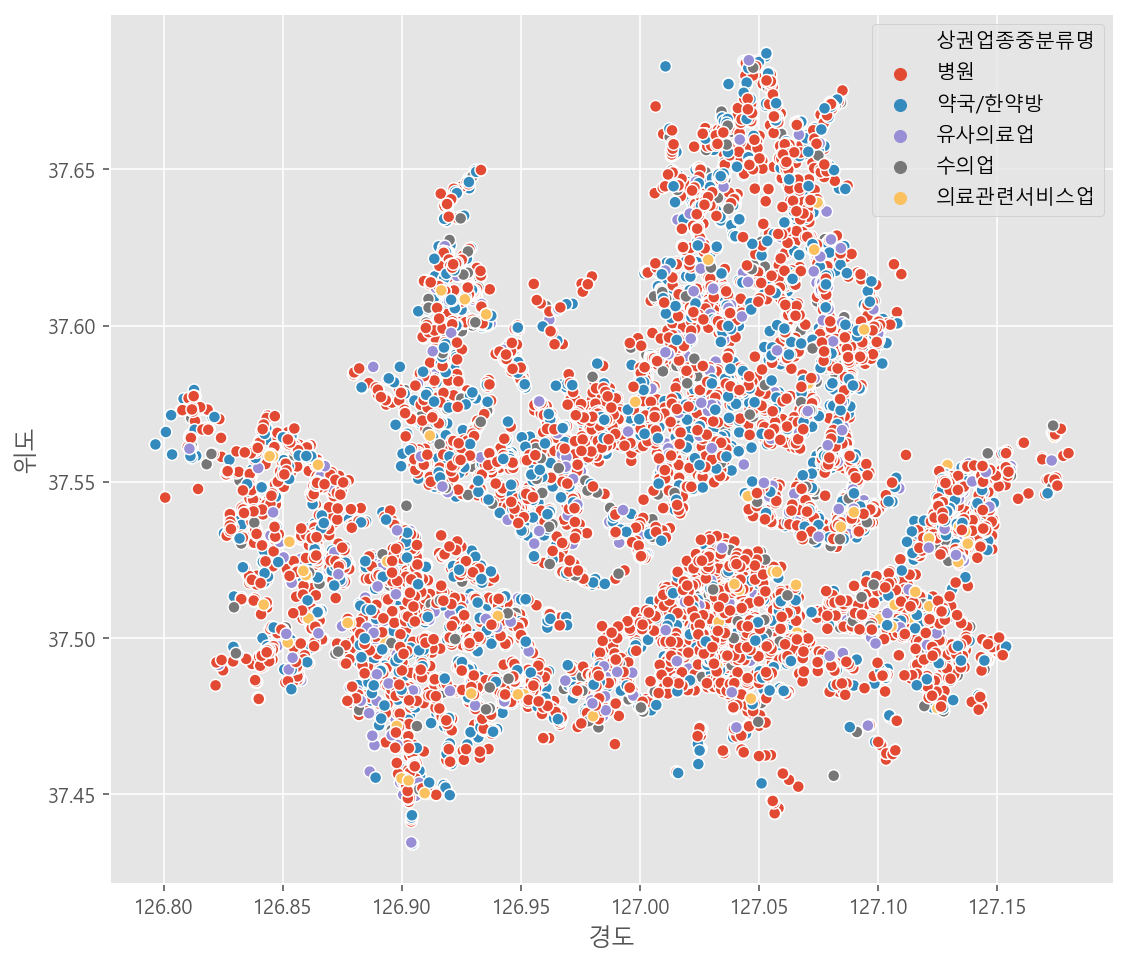

In [121]:
# seaborn의 scatterplot 을 통해 "상권업종중분류명" 경도와 위도를 표시해 봅니다.

plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="상권업종중분류명")

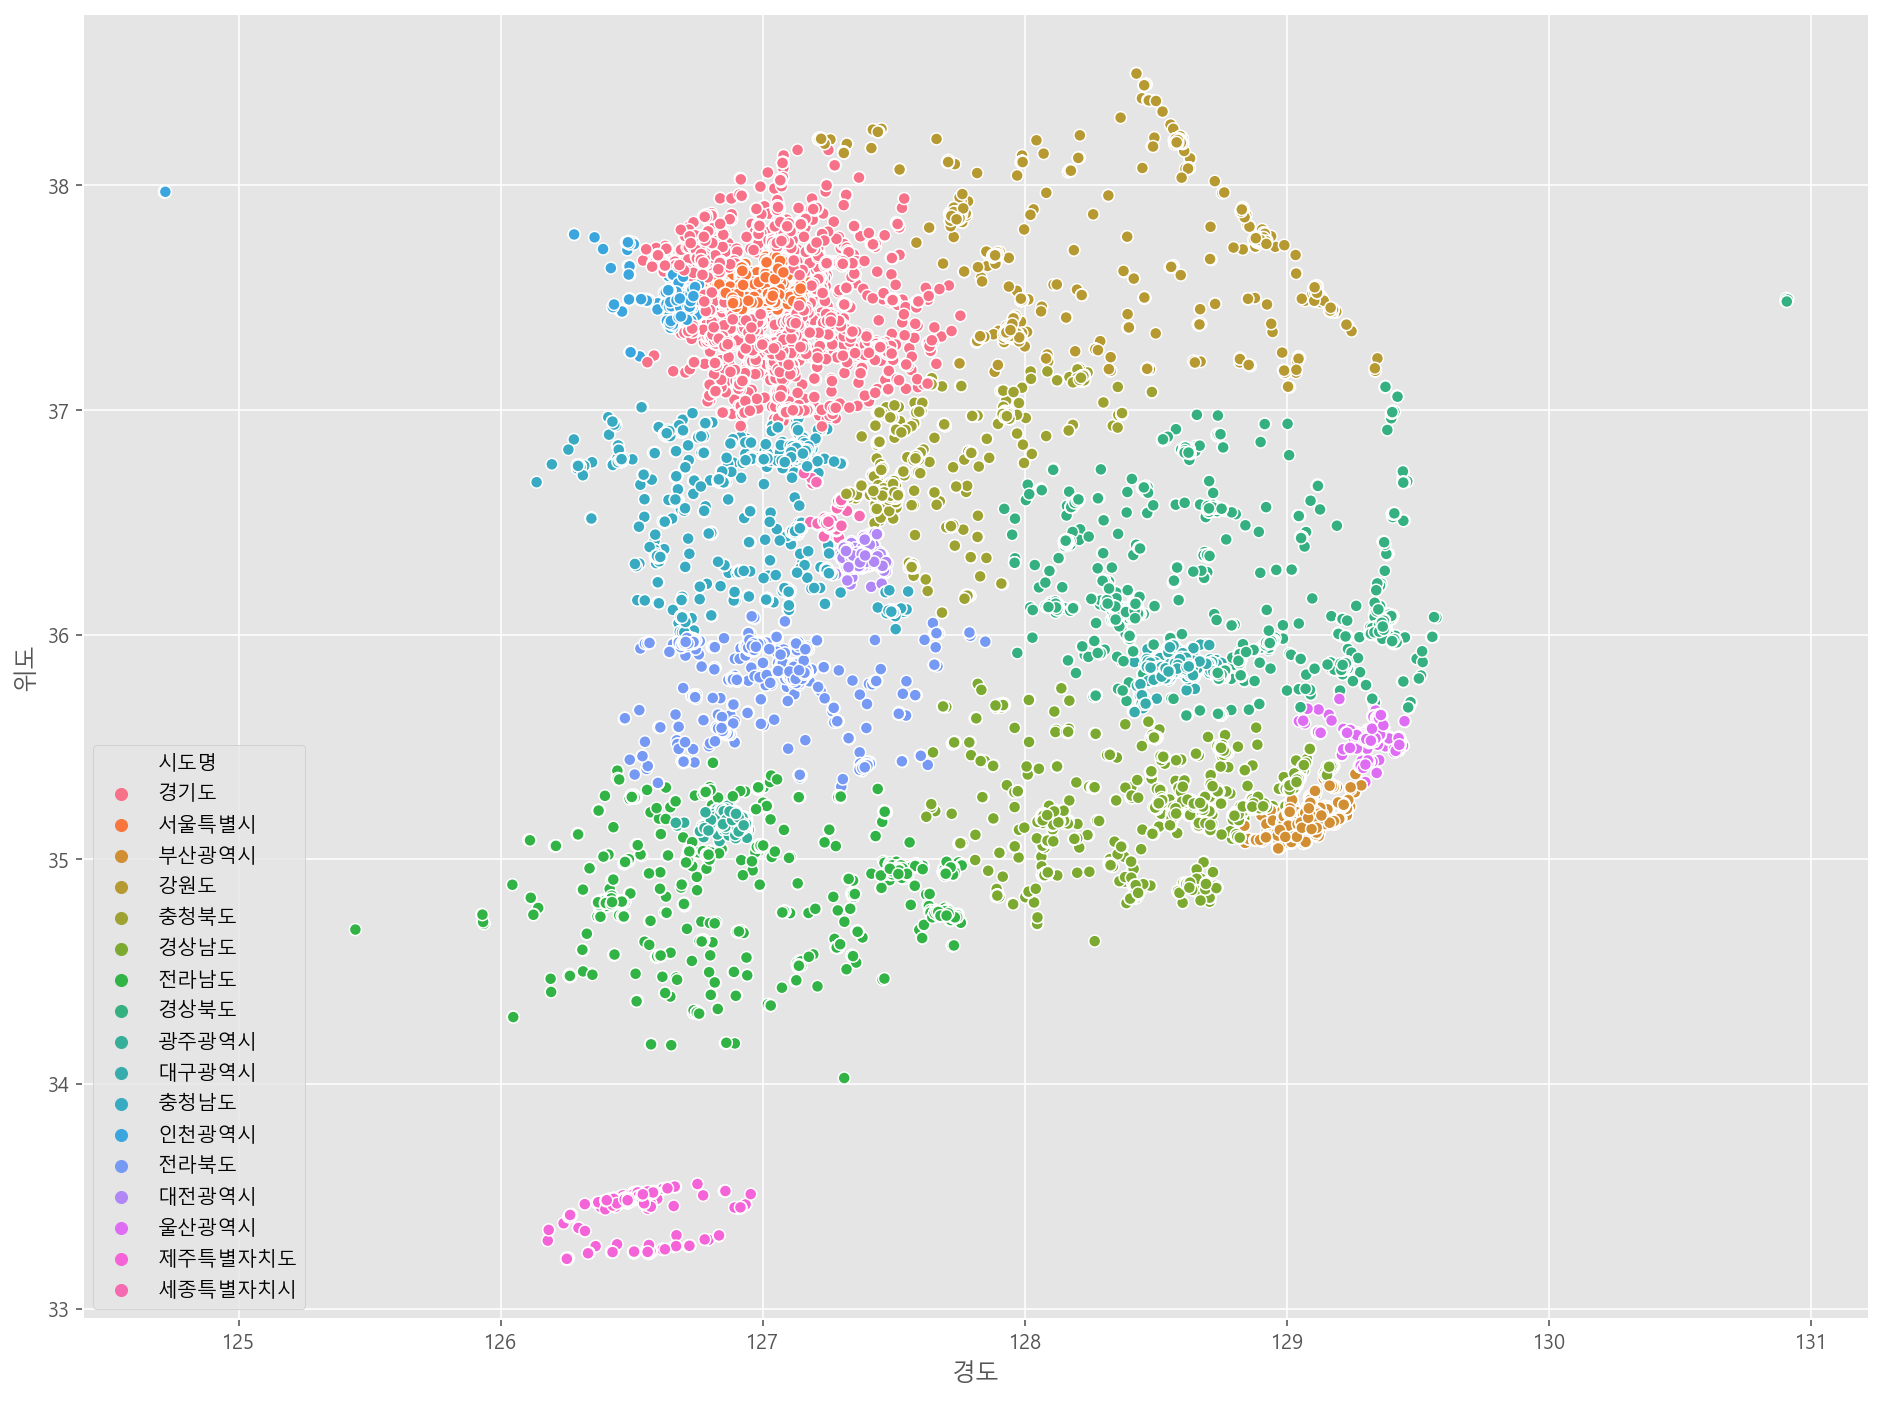

In [123]:
# seaborn의 scatterplot 을 통해 전국 데이터(df)로 시도별 경도와 위도를 표시해 봅니다.

plt.figure(figsize=(16, 12))
sns.scatterplot(data=df, x="경도", y="위도", hue="시도명")


## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://t1.daumcdn.net/cfile/tistory/99576B4A5B751DC902">

검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.


`conda install -c conda-forge folium`

### Folium 사용예제
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/


In [ ]:
# 아직 설치가 되지 않았다면 아래 명령어의 주석을 풀고 설치해 주세요.
# 주피터 노트북에서도 설치가 가능하지만 되도록이면 터미널 환경에서 설치를 추천합니다.
# !conda install -c conda-forge -y folium

In [125]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge -y folium 
# 지도 시각화를 위한 라이브러리

import folium

In [124]:
# geo_df 에 df_seoul_hospital 을 copy() 로 복사해서 할당합니다.

geo_df = df_seoul_hospital.copy()

In [130]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 

geo_df["위도"].mean()
geo_df["경도"].mean()

127.00850537565638

In [133]:
map = folium.Map(location=[geo_df["위도"].mean(),geo_df["경도"].mean()])
map

In [155]:
for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map